In [10]:
import pandas as pd
import matplotlib.pyplot as plt

trafficStop = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv')
investigations = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/investigations.csv')
crimes = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/crimes.csv')
policeStations = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/police_stations.csv')
policeDistricts = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/police_districts.csv')

/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/4065829516.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trafficStop = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv')


(array([941070., 402260., 221198., 132408.,  71889.,  40409.,  24519.,
         14169.,   9690.,   7484.]),
 array([    0. ,  5924.6, 11849.2, 17773.8, 23698.4, 29623. , 35547.6,
        41472.2, 47396.8, 53321.4, 59246. ]),
 <BarContainer object of 10 artists>)

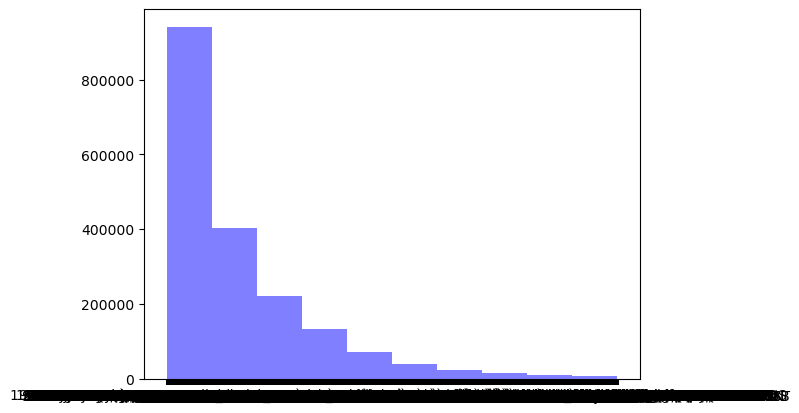

In [47]:
trafficStop['location'] = trafficStop['location'].apply(lambda x: str(x))
plt.hist(trafficStop['location'], bins=10, color='blue', alpha=0.5)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'black'),
  Text(1, 0, 'white'),
  Text(2, 0, 'hispanic'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'asian/pacific islander'),
  Text(5, 0, 'other')])

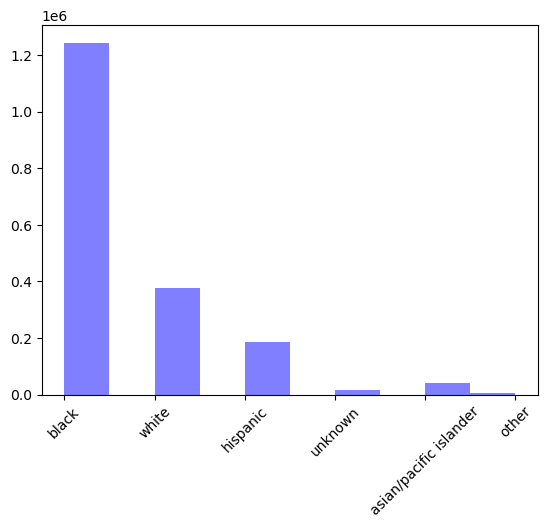

In [18]:
# race
plt.hist(trafficStop['subject_race'], bins=10, color='blue', alpha=0.5)

# adjust the x-axis with greater interval
plt.xticks(rotation=45)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

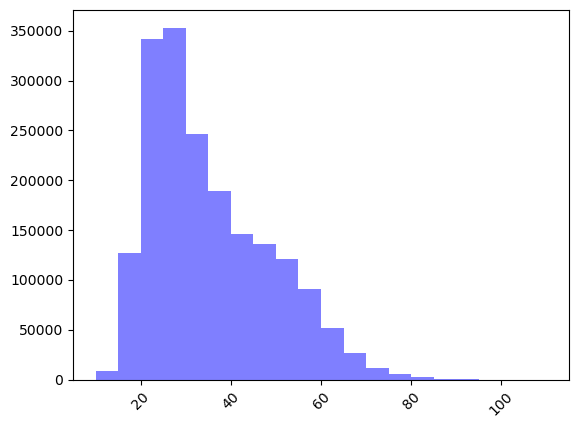

In [6]:
# age
plt.hist(trafficStop['subject_age'], bins=20, color='blue', alpha=0.5)

# adjust the x-axis with greater interval
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'male'), Text(1, 0, 'female'), Text(2, 0, 'nan')])

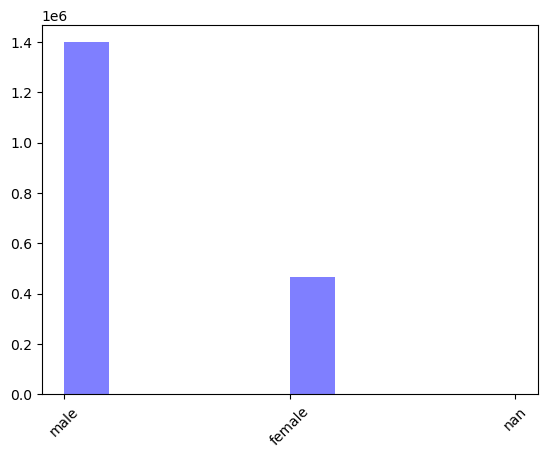

In [12]:
# sex
trafficStop['subject_sex'] = trafficStop['subject_sex'].apply(lambda x: str(x))
plt.hist(trafficStop['subject_sex'], bins=10, color='blue', alpha=0.5)

# adjust the x-axis with greater interval
plt.xticks(rotation=45)

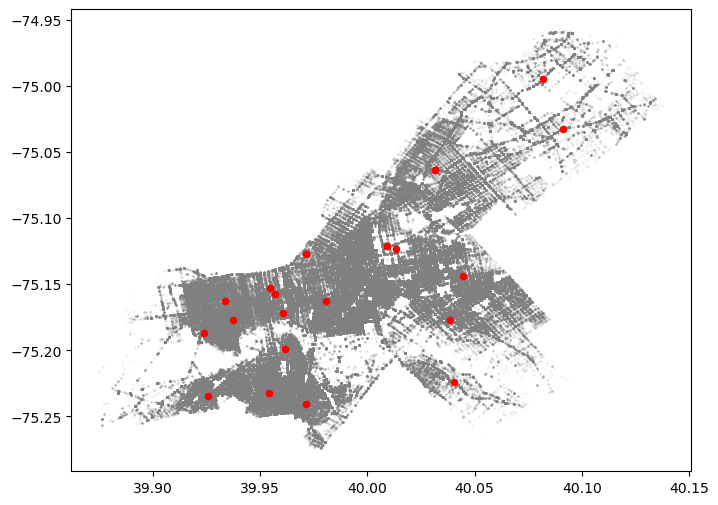

In [43]:
# use 'lat' and 'lng' to plot the location of traffic stops
plt.figure(figsize = (8,6))

plt.scatter(trafficStop['lat'], trafficStop['lng'], color='grey', s=0.1,alpha=0.1)

plt.scatter(policeStations['lat'], policeStations['lng'], color='red', s=20,alpha=1)
plt.show()

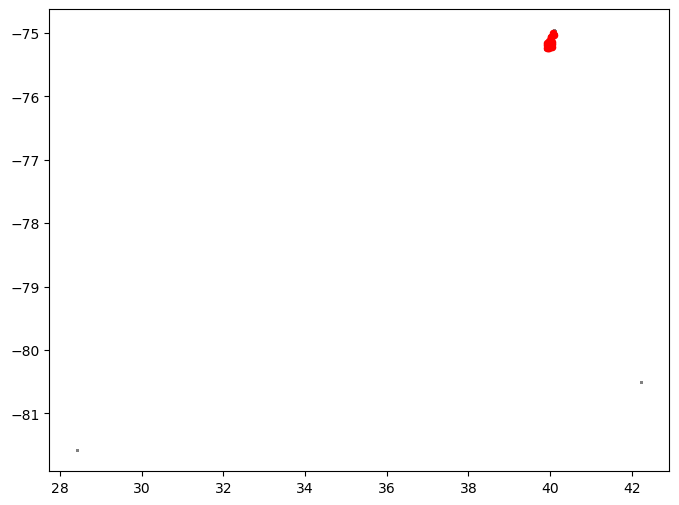

In [96]:
# use 'lat' and 'lng' to plot the location of traffic stops
plt.figure(figsize = (8,6))

plt.scatter(investigations['lat'], investigations['lng'], color='grey', s=0.1,alpha=0.1)

plt.scatter(policeStations['lat'], policeStations['lng'], color='red', s=20,alpha=1)
plt.show()

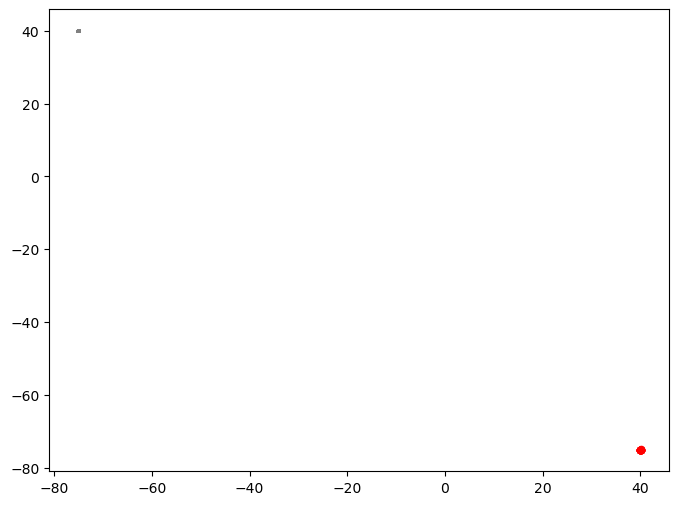

In [131]:
plt.figure(figsize = (8,6))
plt.scatter( crimes['lng'], crimes['lat'], color='grey', s=0.1,alpha=0.1)
plt.scatter(policeStations['lat'], policeStations['lng'], color='red', s=20,alpha=1)
plt.show()

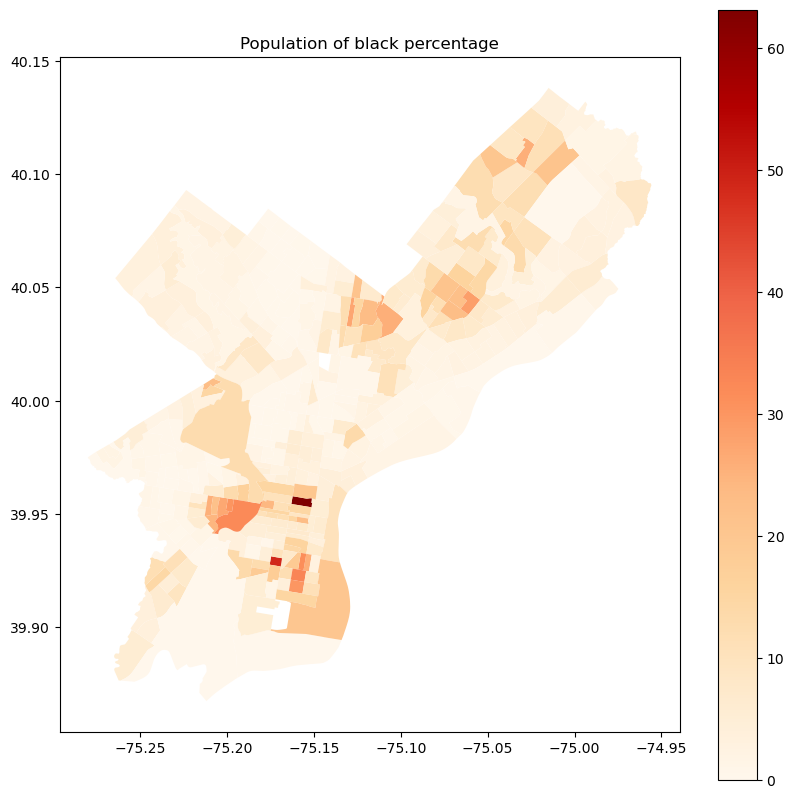

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


census = gpd.read_file('Data/Census_Tracts_2010-shp/c16590ca-5adf-4332-aaec-9323b2fa7e7d2020328-1-1jurugw.pr6w.shp')
populations = pd.read_csv('APAC_2023_Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv')
census['GEOID10'] = census['GEOID10'].astype(int)
populations = populations.merge(census[['GEOID10', 'geometry']], how='left', left_on='GEOGRAPHY_NAME', right_on='GEOID10')
populations = gpd.GeoDataFrame(populations)
fig6, ax = plt.subplots(figsize=(10,10))
populations.plot(column='PERCENT_ASIAN_NH', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Population of black percentage')
plt.show()

/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/4253308704.py:4: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crash_info = pd.read_csv('./APAC_2023_Datasets/Crashes/crash_info_general.csv')


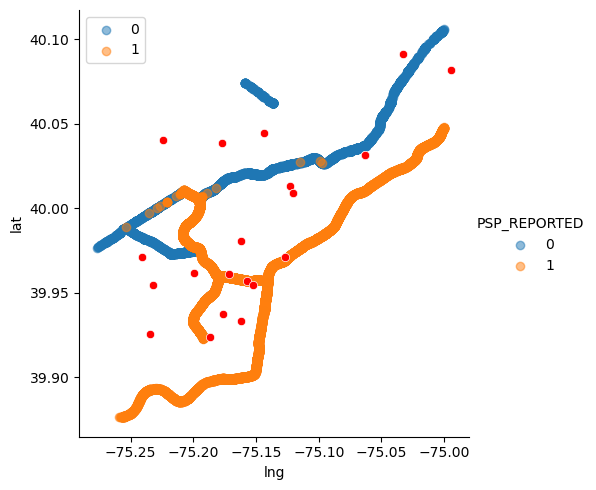

In [110]:
import seaborn as sns

df_police = pd.read_csv('./APAC_2023_Datasets/Traffic, Investigations _ Other/police_stations.csv')
df_crash_info = pd.read_csv('./APAC_2023_Datasets/Crashes/crash_info_general.csv')
df_crash_info = df_crash_info[df_crash_info.columns[1:]]
cond = (df_crash_info['DEC_LAT'].isna())|(df_crash_info['DEC_LONG'].isna())
df_crash_info = df_crash_info.loc[~cond,:]

df_crash_info = df_crash_info.rename(columns={'DEC_LAT':'lat','DEC_LONG':'lng'})

df_flag = pd.read_csv('./APAC_2023_Datasets/Crashes/crash_info_flag_variables.csv')
df_flag = df_flag.merge(df_crash_info[['CRN','lat','lng','fips','CRASH_MONTH','CRASH_YEAR','DAY_OF_WEEK']],on=['CRN'])
lm = sns.lmplot(x='lng', y='lat',  hue='PSP_REPORTED', 
           data=df_flag[(df_flag.lat>39.8)&(df_flag.lng<-75.0)&
                        (df_flag.CORE_NETWORK==1)],
           fit_reg=False, scatter_kws={'alpha':0.5})
sns.scatterplot(x='lng', y='lat',data=df_police,ax=lm.ax,color='red')
#sns.scatterplot(x='lng', y='lat',data=df_crime,ax=lm.ax,color='green')
plt.show()

/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/2194450693.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')


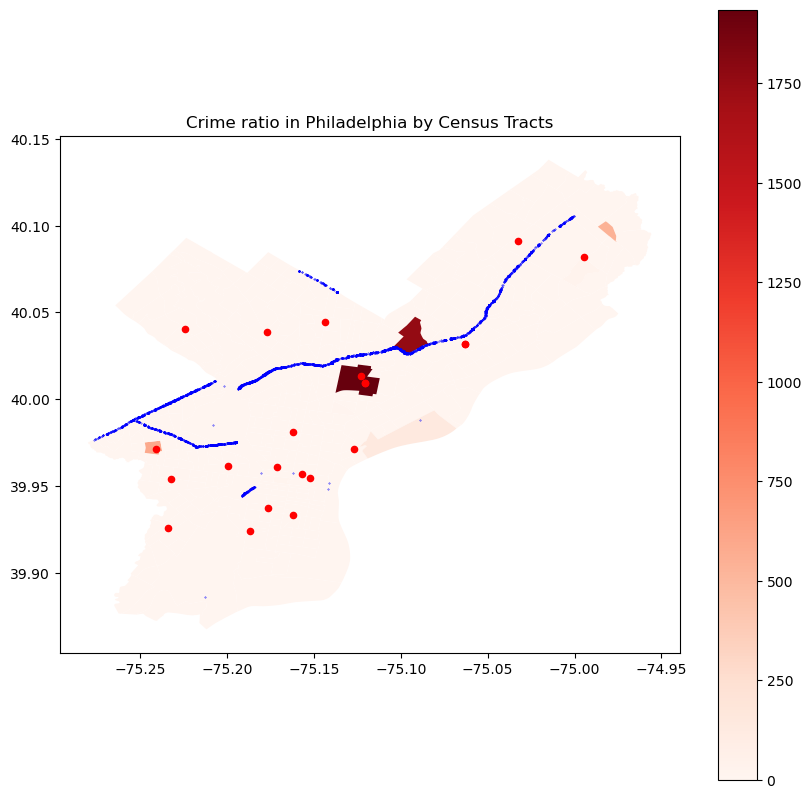

<Figure size 800x600 with 0 Axes>

In [115]:
populations = pd.read_csv('APAC_2023_Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv')
crime = pd.read_csv('APAC_2023_Datasets/Traffic, Investigations _ Other/crimes.csv')
crime = gpd.GeoDataFrame(crime, geometry=gpd.points_from_xy(crime.lng, crime.lat))
crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')
crime_count = crime_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig7, ax = plt.subplots(figsize=(10,10))
data = crime_count['count']/populations['COUNT_ALL_RACES_ETHNICITIES']
data[377] = 0
data[378] = 0
data[379] = 0
plt.figure(figsize = (8,6))
census.plot(column=data, cmap='Reds', legend=True, ax=ax)
data=df_flag[(df_flag.lat>39.8)&(df_flag.lng<-75.0)&(df_flag.CORE_NETWORK==1)&(df_flag.INTERSTATE==0)]
df_police = gpd.GeoDataFrame(df_police, geometry=gpd.points_from_xy(df_police.lng, df_police.lat))
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lng, data.lat))
data.plot(ax=ax, color='blue', markersize=0.1)
df_police.plot(ax=ax, color='red', markersize=20)
ax.set_title('Crime ratio in Philadelphia by Census Tracts')
plt.show()

/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/3753614521.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')


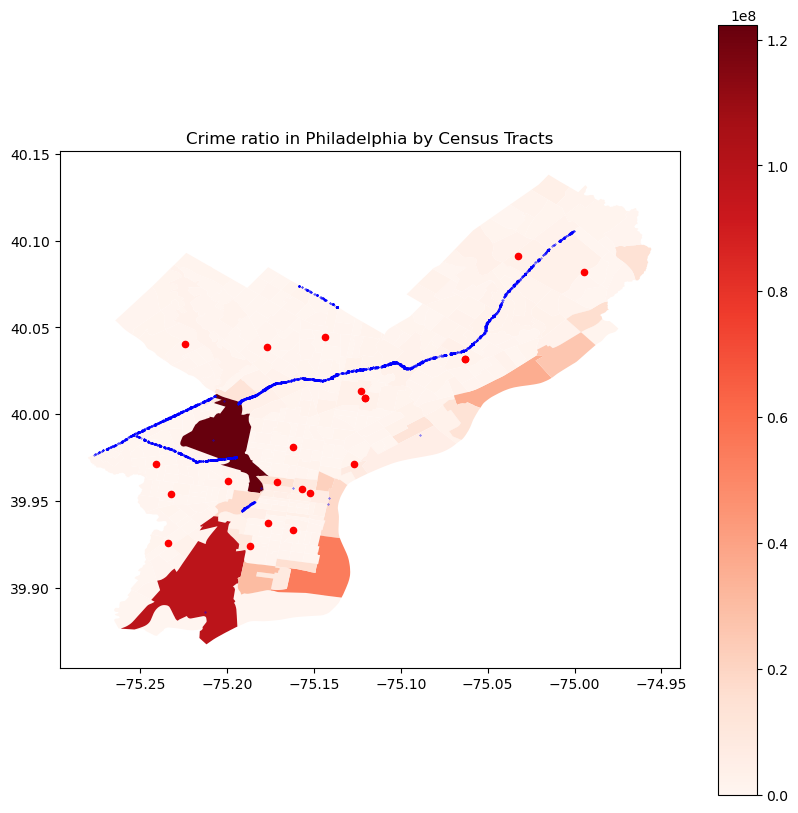

<Figure size 800x600 with 0 Axes>

In [170]:

crime = gpd.GeoDataFrame(crime, geometry=gpd.points_from_xy(crime.lng, crime.lat))
crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')
# calculate the traffic volume in each census tract by adding the 'recordnum' in traffic_volume

crime_count = crime_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig7, ax = plt.subplots(figsize=(10,10))
data = crime_count['count']/populations['COUNT_ALL_RACES_ETHNICITIES']
data[377] = 0
data[378] = 0
data[379] = 0
# crime_ratio = pd.DataFrame()
# crime_ratio['crime_ratio'] = data
# crime_ratio['count'] =  crime_count['count']
# crime_ratio['populations'] = populations['COUNT_ALL_RACES_ETHNICITIES']
# print(crime_ratio)
plt.figure(figsize = (8,6))
census.plot(column=traffic_volume['count'], cmap='Reds', legend=True, ax=ax)
data=df_flag[(df_flag.lat>39.8)&(df_flag.lng<-75.0)&(df_flag.CORE_NETWORK==1)&(df_flag.INTERSTATE==0)]
df_police = gpd.GeoDataFrame(df_police, geometry=gpd.points_from_xy(df_police.lng, df_police.lat))
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lng, data.lat))
data.plot(ax=ax, color='blue', markersize=0.1)
df_police.plot(ax=ax, color='red', markersize=20)
# traffic_volume.plot(ax=ax, color='green', markersize=0.1)
ax.set_title('Crime ratio in Philadelphia by Census Tracts')
plt.show()

In [169]:
traffic_volume = pd.read_csv('Traffic_Count_Locations.csv')
traffic_volume = traffic_volume[(traffic_volume.setdate>='2010-01-01')&(traffic_volume.setdate<='2022-12-31')]
traffic_volume = traffic_volume[(traffic_volume.type=='Volume') |(traffic_volume.type=='15 min Volume')]
# traffic_volume = pd.read_csv('Traffic_Count_Locations.csv')
traffic_volume = gpd.GeoDataFrame(traffic_volume, geometry=gpd.points_from_xy(traffic_volume.X, traffic_volume.Y))
traffic_volume = (gpd.sjoin(census, traffic_volume, predicate='contains').groupby(level=0))['recordnum'].sum().reset_index(name='count')
traffic_volume = traffic_volume.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
print(traffic_volume)

     index       count
0        0    273263.0
1        1    145269.0
2        2    415435.0
3        3    185301.0
4        4    223302.0
..     ...         ...
379    379  15346823.0
380    380   2975292.0
381    381   2060571.0
382    382   4954747.0
383    383    745022.0

[384 rows x 2 columns]


/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/3284477352.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  traffic_volume = (gpd.sjoin(census, traffic_volume, predicate='contains').groupby(level=0))['recordnum'].sum().reset_index(name='count')


(-75.3, -74.9)

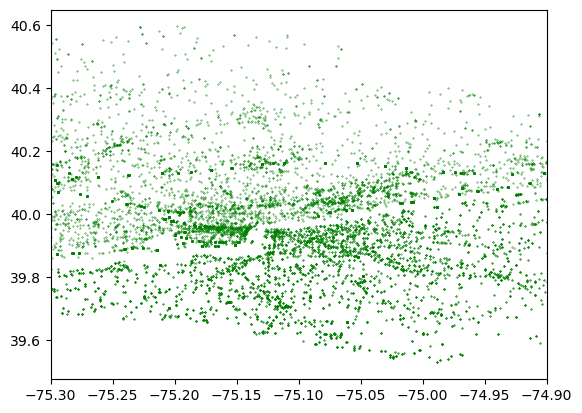

In [144]:
traffic_volume = pd.read_csv('Traffic_Count_Locations.csv')
traffic_volume = traffic_volume[(traffic_volume.setdate>='2013-01-01')&(traffic_volume.setdate<='2019-12-31')]
traffic_volume = traffic_volume[(traffic_volume.type=='Volume') |(traffic_volume.type=='15 min Volume')]

plt.scatter(traffic_volume['X'], traffic_volume['Y'], s=0.1, color='green')
# adjuxt x interval
plt.xlim(-75.3, -74.9)

/var/folders/ps/lvm9x7k52b3f3xmw967hqn9w0000gn/T/ipykernel_57334/108343194.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  trafficStop_count = gpd.sjoin(census, trafficStop, predicate='contains').groupby(level=0).size().reset_index(name='count')


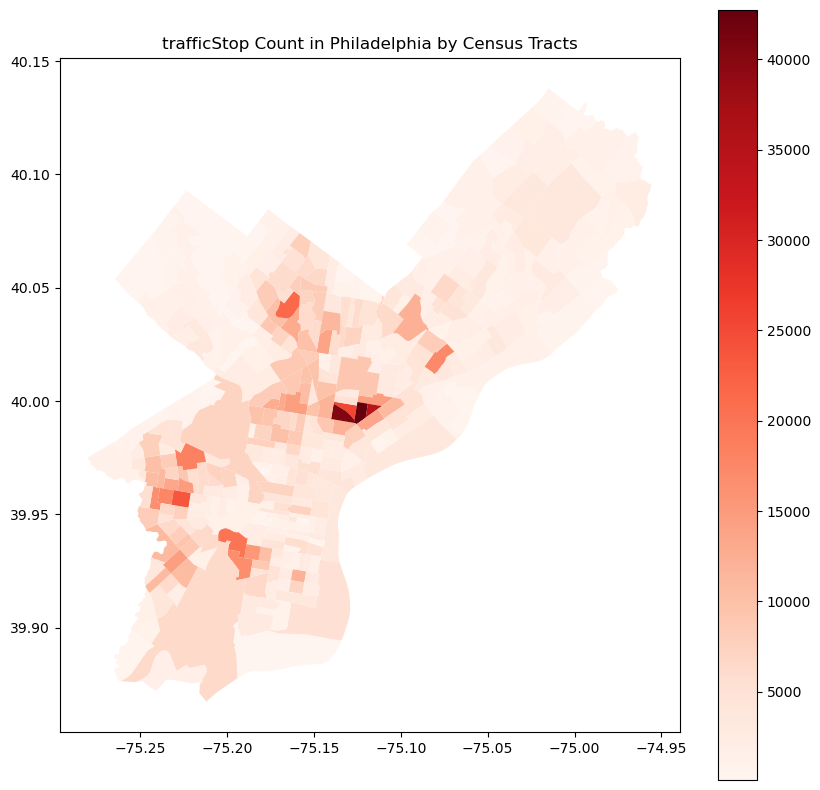

In [116]:

trafficStop = gpd.GeoDataFrame(trafficStop, geometry=gpd.points_from_xy(trafficStop.lng, trafficStop.lat))
trafficStop_count = gpd.sjoin(census, trafficStop, predicate='contains').groupby(level=0).size().reset_index(name='count')
trafficStop_count = trafficStop_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig7, ax = plt.subplots(figsize=(10,10))
census.plot(column=trafficStop_count['count'], cmap='Reds', legend=True, ax=ax)
ax.set_title('trafficStop Count in Philadelphia by Census Tracts')
plt.show()

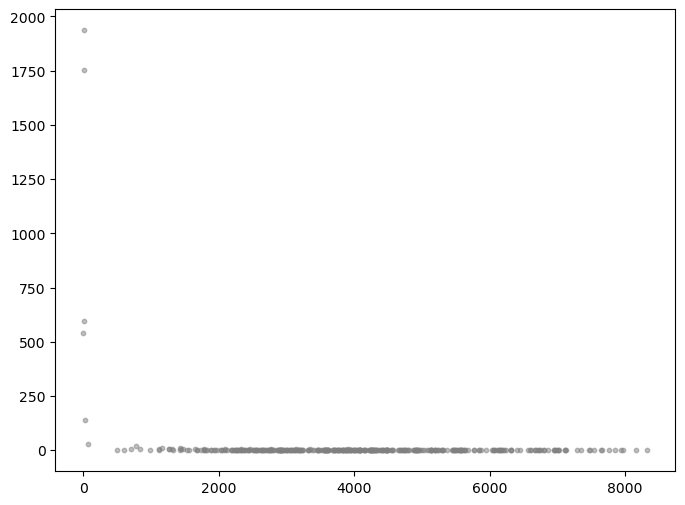

In [74]:
import numpy as np
# calculate the correaltion between crime count and population
# print(populations['COUNT_ALL_RACES_ETHNICITIES'])
# print(crime_count['count'])

crime_per_capital = crime_count['count']/populations['COUNT_ALL_RACES_ETHNICITIES']
crime_adj = crime_count['count'] - np.mean(crime_count['count'])
plt.figure(figsize = (8,6))
# plt.scatter(populations['PERCENT_WHITE_NH'], crime_adj, color='grey', s=10,alpha=0.5)
# plt.scatter(populations['PERCENT_BLACK_NH'], crime_count['count'], color='red', s=10,alpha=0.5)
# plt.scatter(populations['PERCENT_ASIAN_NH'], crime_per_capital, color='blue', s=10,alpha=0.5)
# plt.scatter(populations['PERCENT_HISPANIC'], crime_per_capital, color='green', s=10,alpha=0.5)
# plt.legend(['white', 'black', 'asian', 'hispanic'])

plt.scatter(populations['COUNT_ALL_RACES_ETHNICITIES'], crime_per_capital, color='grey', s=10,alpha=0.5)
plt.show()


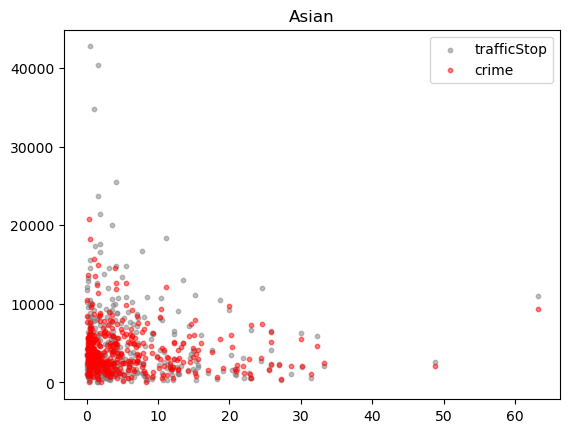

In [85]:
plt.scatter(populations['PERCENT_ASIAN_NH'], trafficStop_count['count'], color='grey', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_ASIAN_NH'], crime_count['count'], color='red', s=10,alpha=0.5)
plt.legend(['trafficStop', 'crime'])
plt.title('Asian')
plt.show()


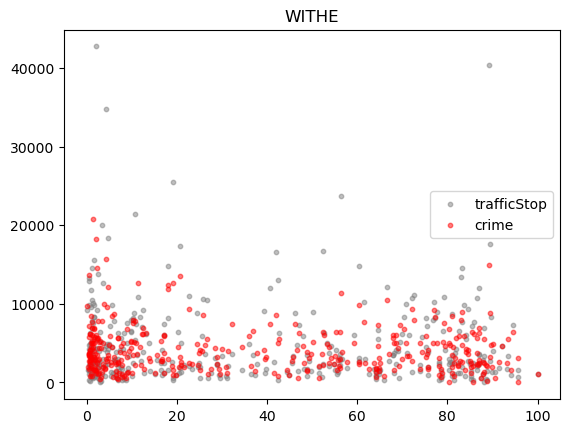

In [86]:
# white
plt.scatter(populations['PERCENT_WHITE_NH'], trafficStop_count['count'], color='grey', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_WHITE_NH'], crime_count['count'], color='red', s=10,alpha=0.5)
plt.legend(['trafficStop', 'crime'])
plt.title('WITHE')
plt.show()

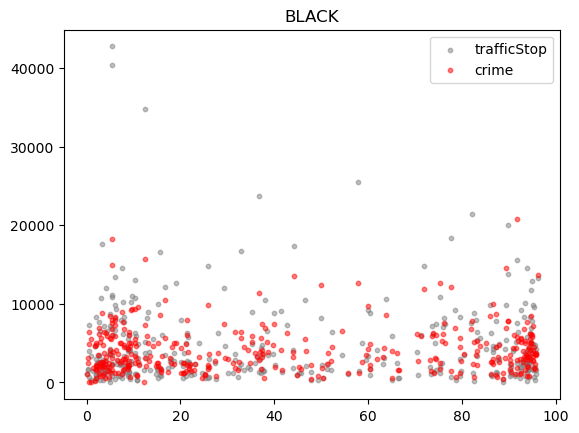

In [87]:
# BLACK
plt.scatter(populations['PERCENT_BLACK_NH'], trafficStop_count['count'], color='grey', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_BLACK_NH'], crime_count['count'], color='red', s=10,alpha=0.5)
plt.legend(['trafficStop', 'crime'])
plt.title('BLACK')
plt.show()

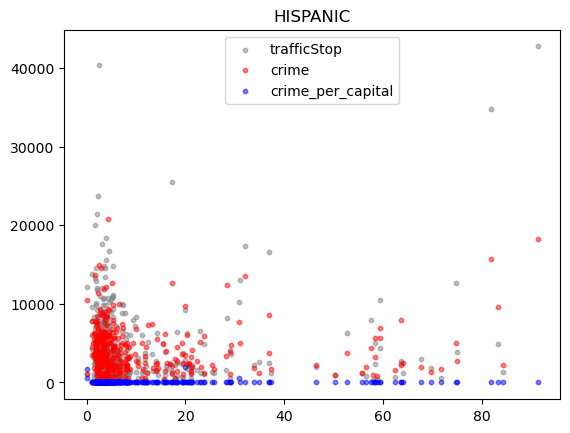

In [94]:
# HISPANIC
plt.scatter(populations['PERCENT_HISPANIC'], trafficStop_count['count'], color='grey', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_HISPANIC'], crime_count['count'], color='red', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_HISPANIC'], crime_per_capital, color='blue', s=10,alpha=0.5)
plt.legend(['trafficStop', 'crime', 'crime_per_capital'])
plt.title('HISPANIC')
plt.show()

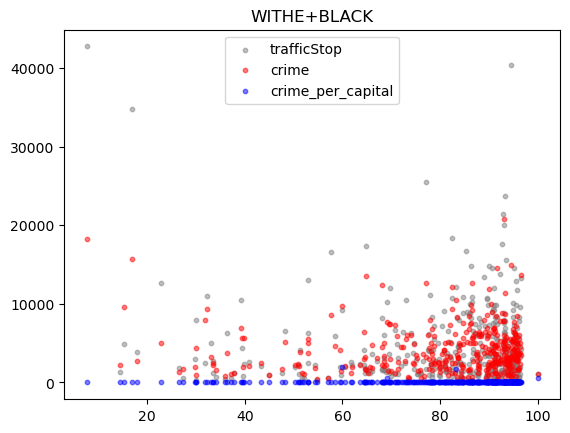

In [95]:
# white
plt.scatter(populations['PERCENT_WHITE_NH']+populations['PERCENT_BLACK_NH'], trafficStop_count['count'], color='grey', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_WHITE_NH']+populations['PERCENT_BLACK_NH'], crime_count['count'], color='red', s=10,alpha=0.5)
plt.scatter(populations['PERCENT_WHITE_NH']+populations['PERCENT_BLACK_NH'], crime_per_capital, color='blue', s=10,alpha=0.5)
plt.legend(['trafficStop', 'crime', 'crime_per_capital'])
plt.title('WITHE+BLACK')
plt.show()